**Data** <br>
The iris data set iris.txt contains 150 data points, each with four predictor variables and one
categorical response. The predictors are the width and length of the sepal and petal of flowers and the
response is the type of flower. The data is available from the R library datasets and can be accessed with
iris once the library is loaded. It is also available at the UCI Machine Learning Repository
(https://archive.ics.uci.edu/ml/datasets/Iris ). The response values are only given to see how well a
specific method performed and should not be used to build the model.


In [1]:
# Installing all of the packages we might need
options(warn=-1) # suppress showing warnings
install.packages("ggplot2")
install.packages("purrr")
install.packages("dplyr")
install.packages("gridExtra")
install.packages("cowplot")
install.packages("corrplot")
install.packages("cluster")
install.packages("RColorBrewer")
install.packages("factoextra")

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Siham\AppData\Local\Temp\Rtmp2FKDDI\downloaded_packages
package 'purrr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Siham\AppData\Local\Temp\Rtmp2FKDDI\downloaded_packages
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Siham\AppData\Local\Temp\Rtmp2FKDDI\downloaded_packages
package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Siham\AppData\Local\Temp\Rtmp2FKDDI\downloaded_packages
package 'cowplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Siham\AppData\Local\Temp\Rtmp2FKDDI\downloaded_packages
package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Siham\AppData\Local\Temp\Rtmp2FKDDI\downloaded_packages
packa

# Exploratory data analysis

Before we start clusering out data set, we need to first inspect it to see if any data pre-processing is needed. We will first inspect data for missing values then visualize how our predictors or combination of predictors correlate with each other.

In [2]:
# reading the data set
iris <- read.table("iris.txt", header = T)

In [3]:
# inspecting the data
head(iris,5)

# Show summary statistics
summary(iris)

# inspect if we have any missing values
is_na <- sum(is.na(iris))
cat("The number of missing values is:", is_na, "\n\n")

# Inspect how many types of flowers we have in our dataset
cat("Flower class: ")
table(iris[,5], iris$Species)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

The number of missing values is: 0 

Flower class: 

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         50         0
  virginica       0          0        50

We have 3 types of iris flower in our dataset

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


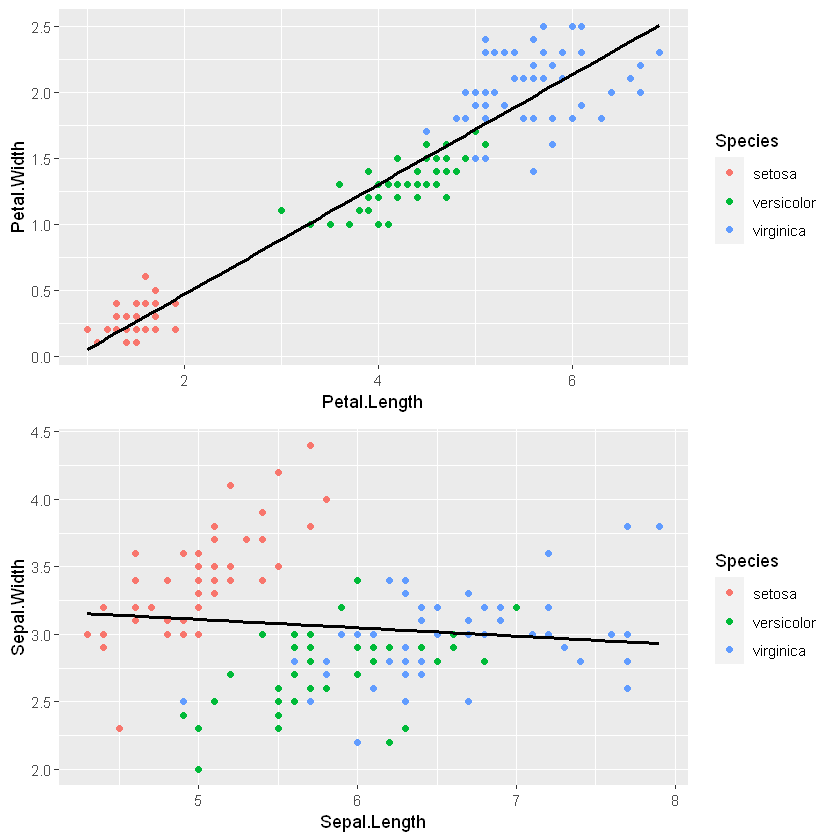

In [4]:
# let's visualize our data
library(ggplot2)
library(gridExtra)

plot1 <- ggplot(iris, aes(x=Petal.Length, y=Petal.Width, color = Species)) + geom_point() +
        geom_smooth(method='lm', color='black', se=F)
plot2 <- ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width, color = Species)) + geom_point() +
        geom_smooth(method='lm', color='black', se=F)

grid.arrange(plot1, plot2)


- From the plots above, we can clearly see a high correlation between petal length and petal width. Our scatter plot can be easliy clustered into 3 clusters. However, measuring the correlation coeff of all the features in our data will help us pick the predictors that would best cluster our data

- In the second plot, we cant differentiate between versicolor and virginica iris types.


corrplot 0.84 loaded


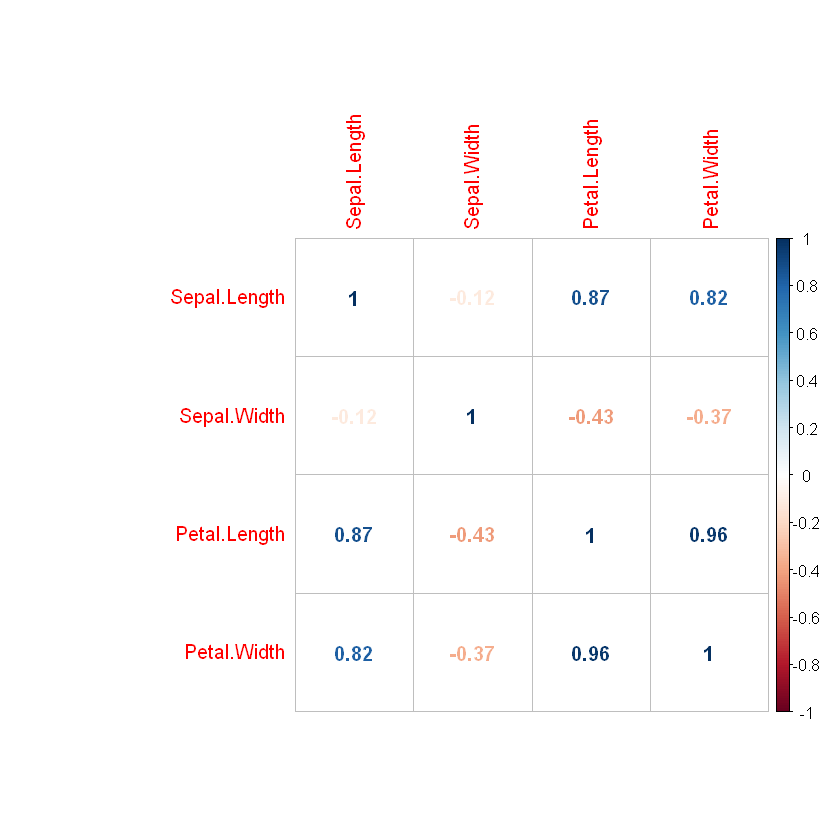

In [5]:
# let's get the correlation matrix between all of our predictors and plot it
library(corrplot)
library(RColorBrewer)

# Correlation matrix
M <-cor(iris[, -5])

corrplot(M, method="number")

- The correlation matrix futher shows that Petal.Width and Petal Length are highly correction (0.96) which matches our scatter plot
- We can also see that Petal Length and Sepal Lenght are also highly correlated with corr coeff of 0.87. <br>

# Kmeans clustering Analysis

- To cluster our data, we experiment a little bit using the following and for different values of k <br>

    1. We will first use our data as is <br>
        1.1. Cluster using all the features in the data <br>
        1.2. Cluster using Petal Width and Petal Length since they're highly correlated <br>
    2. We will scale our data <br>
        2.1. Cluster using Petal Width and Petal Length since they're highly correlated

## Cluster using all the features in the data

In [6]:
# Set a seed to reproduce results
set.seed(42)

# Build a kmeans model on full set of features
model_km2 <- kmeans(iris[,1:4], centers=2, nstart = 25)
model_km3 <- kmeans(iris[,1:4], centers=3, nstart = 25)
model_km4 <- kmeans(iris[,1:4], centers=4, nstart = 25)
model_km5 <- kmeans(iris[,1:4], centers=5, nstart = 25)
model_km6 <- kmeans(iris[,1:4], centers=6, nstart = 25)
model_km7 <- kmeans(iris[,1:4], centers=7, nstart = 25)

# Extract the cluster vector from the model
clust_km2 <- model_km2$cluster
clust_km3 <- model_km3$cluster
clust_km4 <- model_km4$cluster
clust_km5 <- model_km5$cluster
clust_km6 <- model_km6$cluster
clust_km7 <- model_km7$cluster

# Create a new data frame with the cluster assignment
suppressWarnings(suppressMessages(library(dplyr)))
iris_km2 <- mutate(iris[,1:4], cluster=clust_km2)
iris_km3 <- mutate(iris[,1:4], cluster=clust_km3)
iris_km4 <- mutate(iris[,1:4], cluster=clust_km4)
iris_km5 <- mutate(iris[,1:4], cluster=clust_km5)
iris_km6 <- mutate(iris[,1:4], cluster=clust_km6)
iris_km7 <- mutate(iris[,1:4], cluster=clust_km7)

# cluster assignment vs the actual flower class
table(iris_km2$cluster, iris$Species)
table(iris_km3$cluster, iris$Species)
table(iris_km4$cluster, iris$Species)
table(iris_km5$cluster, iris$Species)
table(iris_km6$cluster, iris$Species)
table(iris_km7$cluster, iris$Species)

   
    setosa versicolor virginica
  1     50          3         0
  2      0         47        50

   
    setosa versicolor virginica
  1      0         48        14
  2     50          0         0
  3      0          2        36

   
    setosa versicolor virginica
  1     50          0         0
  2      0          0        32
  3      0         23        17
  4      0         27         1

   
    setosa versicolor virginica
  1      0          0        24
  2     50          0         0
  3      0         24         1
  4      0          0        12
  5      0         26        13

   
    setosa versicolor virginica
  1      0         24         1
  2      0          0        24
  3     22          0         0
  4      0         26        13
  5     28          0         0
  6      0          0        12

   
    setosa versicolor virginica
  1     28          0         0
  2      0          0        22
  3      0          4        15
  4      0         27         1
  5      0         19         0
  6     22          0         0
  7      0          0        12

- Even though we know we have 3 different classes of the iris flowers, we are able to see a better clustering for k = 7 where our accuracy is about `97%`. However, for k = 3, our accuracy is `89.3%`

- For k=2, we can perfectly cluster our data into two clusters, but since we know we have 3 different flower classes, there is no way to diffentiate between versicolor and virginica

- Let's visualize these 3 cases by plotting petal length vs petal width

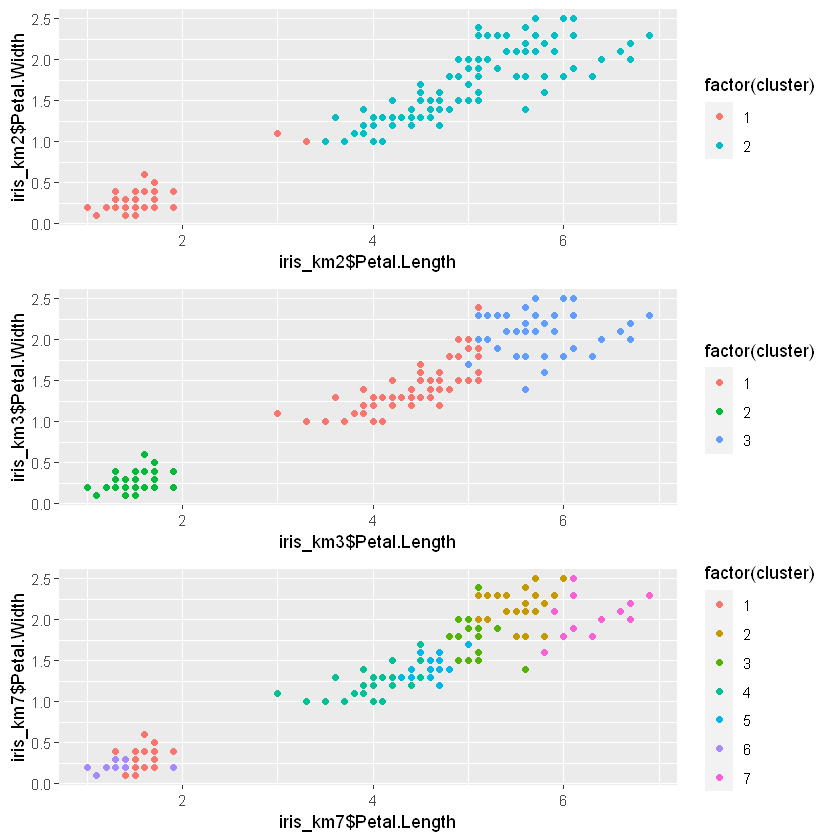

In [7]:
# plot for k =2
set.seed(42)
plot_k2 <- ggplot(iris_km2, aes(iris_km2$Petal.Length, y= iris_km2$Petal.Width, color=factor(cluster))) + geom_point()

# plot for k=3
plot_k3 <- ggplot(iris_km3, aes(iris_km3$Petal.Length, y= iris_km3$Petal.Width, color=factor(cluster))) + geom_point()

# plot for k=7
plot_k7 <- ggplot(iris_km7, aes(iris_km7$Petal.Length, y= iris_km7$Petal.Width, color=factor(cluster))) + geom_point()

grid.arrange(plot_k2, plot_k3, plot_k7)

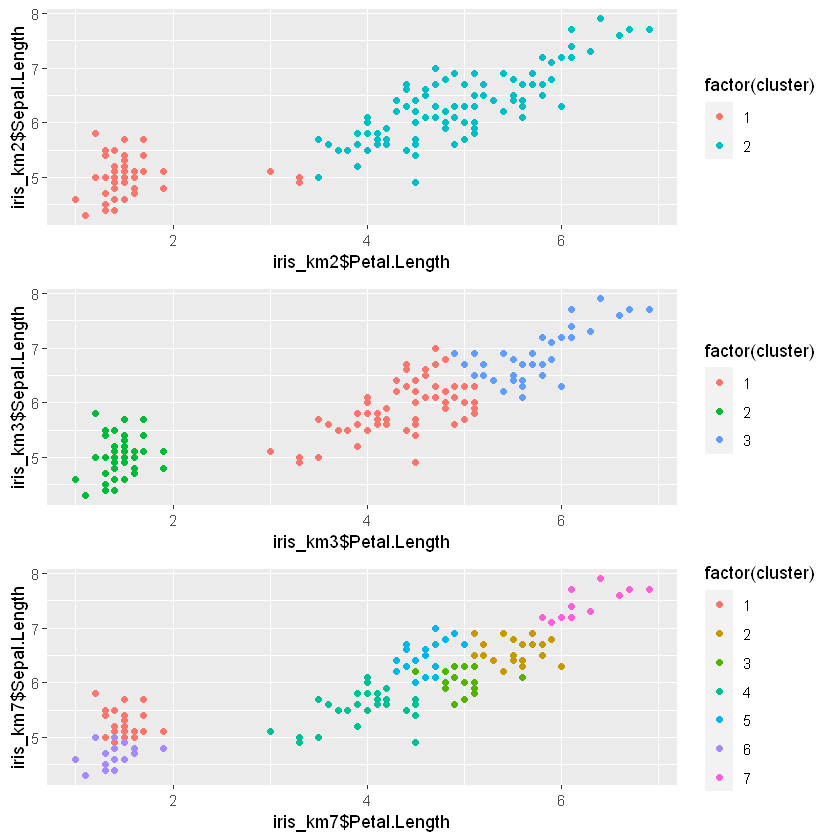

In [8]:
# plot for k =2
set.seed(42)
plot_k2 <- ggplot(iris_km2, aes(iris_km2$Petal.Length, y= iris_km2$Sepal.Length, color=factor(cluster))) + geom_point()

# plot for k=3
plot_k3 <- ggplot(iris_km3, aes(iris_km3$Petal.Length, y= iris_km3$Sepal.Length, color=factor(cluster))) + geom_point()

# plot for k=7
plot_k7 <- ggplot(iris_km7, aes(iris_km7$Petal.Length, y= iris_km7$Sepal.Length, color=factor(cluster))) + geom_point()

grid.arrange(plot_k2, plot_k3, plot_k7)

Using `Petal length and width` or `Petal length and Sepal Length` would be more appropriate to cluster our data

**Let's generate the elbow plot**

To compute and plot the elbow plot, one can use `fviz_nbclust` from `factoextra` package

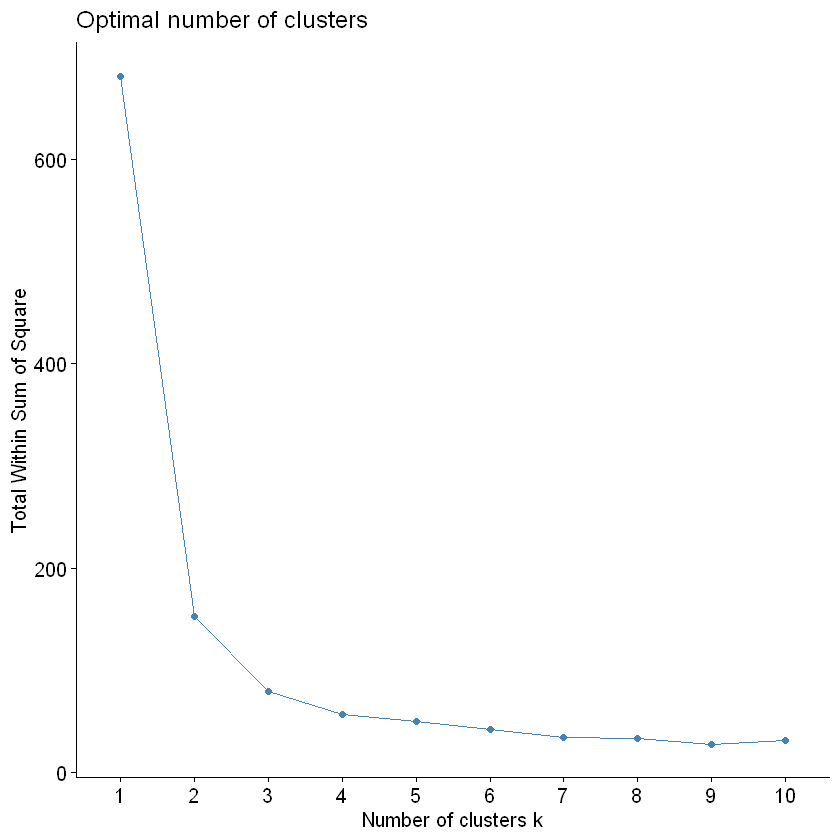

In [9]:
suppressWarnings(suppressMessages(library(factoextra)))
set.seed(42)
fviz_nbclust(iris[,1:4], kmeans, method = "wss")

- The results from the elbow plot using `fviz_nbclust` method above suggest that 2 is the optimal number of clusters as it appears to be the bend in the elbow.

- However, we can still see an improvement in the total within sum of the squares from `k=2` to `k=3`. Even if we didnt have a prior knowledge of how many iris flower classes we have, using `k = 3` does provide us with better clustering results. So, the recommended  number of clusters is `k=3` <br>


<strong>Let's create a dataFrame of the total within cluster distance and plot it to see if we can notice any diffrences between the `fviz_nbclust` vs our manual method's performance </strong>

   k tot_withinss
1  2    152.34795
2  3     78.85144
3  4     71.75951
4  5     49.86225
5  6     39.03999
6  7     37.25063
7  8     32.55390
8  9     27.98169
9 10     29.77365


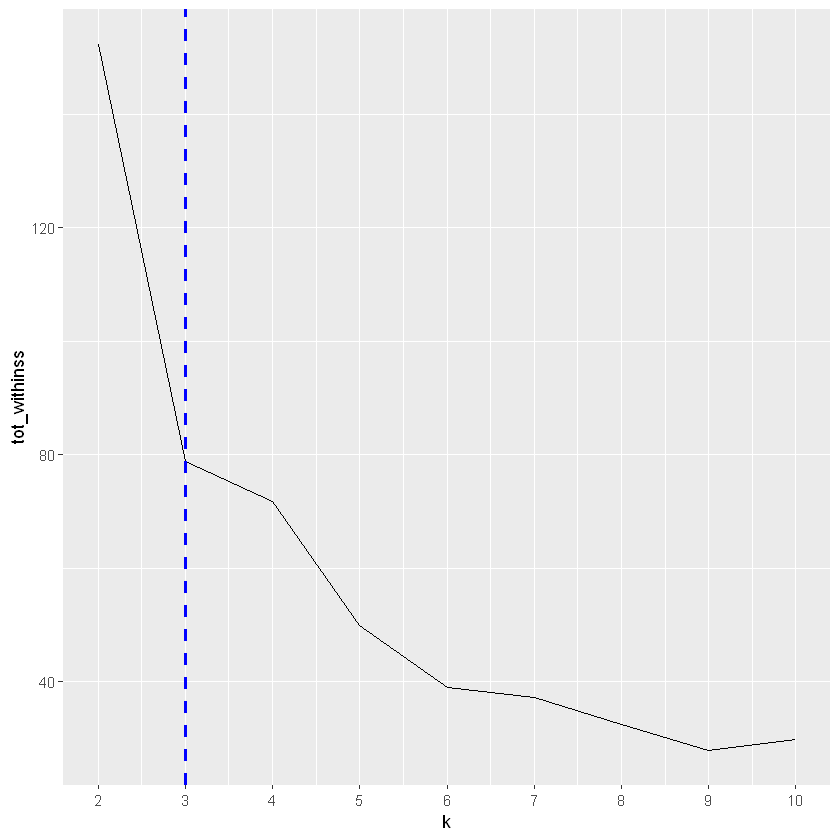

In [10]:
# Let's plot the elbow plot manually
set.seed(42)
library(purrr)
tot_withinss <- map_dbl(2:10, function(k){
    
    model <- kmeans(iris[,1:4], centers = k)
    model$tot.withinss

})

elbow_df <- data.frame(
    k = 2:10,
    tot_withinss = tot_withinss
)

print(elbow_df)


# Generating the elbow plot

ggplot(elbow_df, aes(x=k, y=tot_withinss)) + geom_line() + geom_vline(xintercept=3, linetype="dashed", 
                color = "blue", size=1) +
scale_x_continuous(breaks= 2:10)

We can clearly see a lot of improvement from k=2 to k=3 and k=4

- Another method widely used in determining the optimal number of clusters is the Silhouette method. The average silhouette width approach measures the quality of a clustering. That is, it determines how well each observation lies within its cluster. A high average silhouette width indicates a good clustering.

[1] 0.7981405 0.4173199 0.4511051

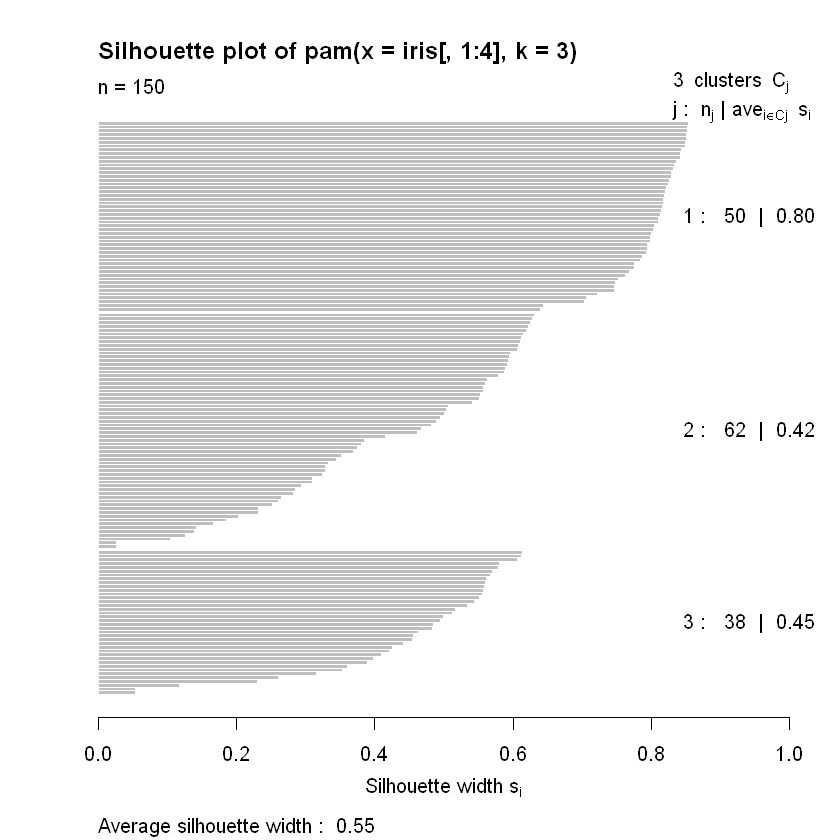

In [11]:
library(cluster)
set.seed(42)
pam_km3 <- pam(iris[,1:4], k=3)

pam_km3$silinfo$clus.avg.widths
sil_plot <- silhouette(pam_km3)
plot(sil_plot)


An average is well above zero means that most observation are well matched to their clusters

## Cluster using Petal Width and Petal Length since they're highly correlated

In [12]:
# Set a seed to reproduce results
set.seed(42)

# Build a kmeans model using petal length and petal witdth
model_km2 <- kmeans(iris[,3:4], centers=2, nstart = 25)
model_km3 <- kmeans(iris[,3:4], centers=3, nstart = 25)
model_km4 <- kmeans(iris[,3:4], centers=4, nstart = 25)
model_km5 <- kmeans(iris[,3:4], centers=5, nstart = 25)
model_km6 <- kmeans(iris[,3:4], centers=6, nstart = 25)
model_km7 <- kmeans(iris[,3:4], centers=7, nstart = 25)

# Extract the cluster vector from the model
clust_km2 <- model_km2$cluster
clust_km3 <- model_km3$cluster
clust_km4 <- model_km4$cluster
clust_km5 <- model_km5$cluster
clust_km6 <- model_km6$cluster
clust_km7 <- model_km7$cluster

# Create a new data frame with the cluster assignment
suppressWarnings(suppressMessages(library(dplyr)))
iris_km2 <- mutate(iris[,3:4], cluster=clust_km2)
iris_km3 <- mutate(iris[,3:4], cluster=clust_km3)
iris_km4 <- mutate(iris[,3:4], cluster=clust_km4)
iris_km5 <- mutate(iris[,3:4], cluster=clust_km5)
iris_km6 <- mutate(iris[,3:4], cluster=clust_km6)
iris_km7 <- mutate(iris[,3:4], cluster=clust_km7)

# cluster assignment vs the actual flower class
table(iris_km2$cluster, iris$Species)
table(iris_km3$cluster, iris$Species)
table(iris_km4$cluster, iris$Species)
table(iris_km5$cluster, iris$Species)
table(iris_km6$cluster, iris$Species)
table(iris_km7$cluster, iris$Species)

   
    setosa versicolor virginica
  1     50          1         0
  2      0         49        50

   
    setosa versicolor virginica
  1      0          2        46
  2      0         48         4
  3     50          0         0

   
    setosa versicolor virginica
  1     50          0         0
  2      0         26         0
  3      0          0        35
  4      0         24        15

   
    setosa versicolor virginica
  1      0         28         7
  2     50          0         0
  3      0         22         0
  4      0          0        13
  5      0          0        30

   
    setosa versicolor virginica
  1      0         26         1
  2      0          0        22
  3     50          0         0
  4      0          5        16
  5      0          0        11
  6      0         19         0

   
    setosa versicolor virginica
  1      0          3        18
  2      0         18         0
  3      0          0        10
  4      0          0        21
  5     50          0         0
  6      0          7         0
  7      0         22         1

For `k=2`, we can perfectly cluster our data into two clusters, but since we know we have 3 different flower classes, there is no way to diffentiate between versicolor and virginica

For `k = 3`, setosa is perfectly clusters, while we are able to cluster 48/50 versicolor and 46/50 of verginica. Our clustering accuracy is `96%`

Let's visualize these two cases

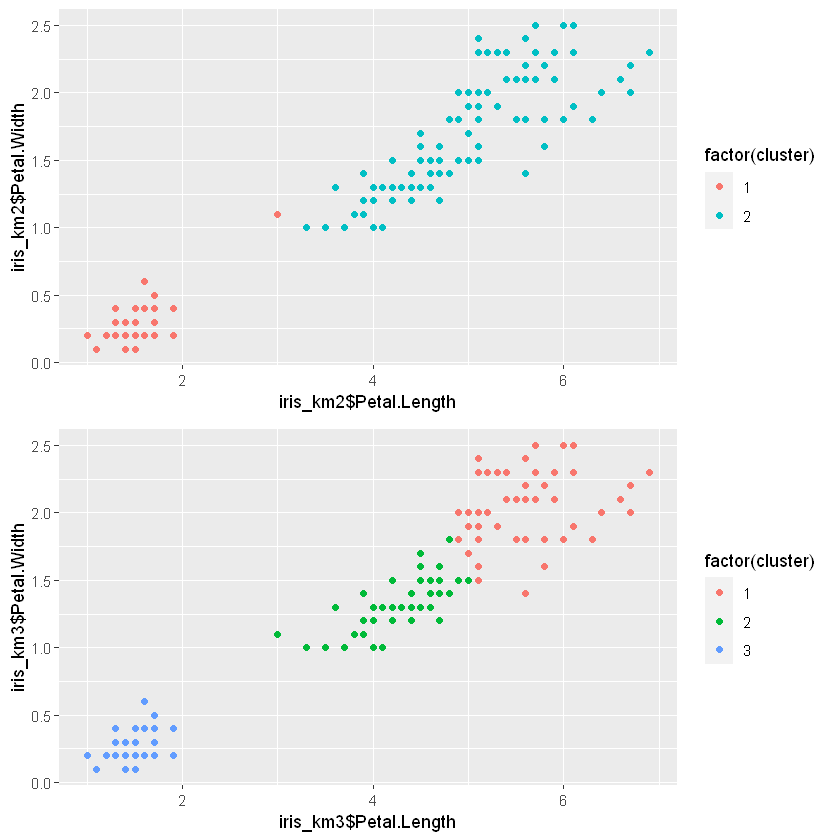

In [13]:
set.seed(42)
# plot for k =2
plot_k2 <- ggplot(iris_km2, aes(iris_km2$Petal.Length, y= iris_km2$Petal.Width, color=factor(cluster))) + geom_point()

# plot for k=3
plot_k3 <- ggplot(iris_km3, aes(iris_km3$Petal.Length, y= iris_km3$Petal.Width, color=factor(cluster))) + geom_point()

grid.arrange(plot_k2, plot_k3)

   k tot_withinss
1  2    86.390220
2  3    31.412886
3  4    30.443013
4  5    14.067950
5  6    13.010934
6  7    18.100349
7  8     8.308250
8  9     8.220004
9 10     6.614628


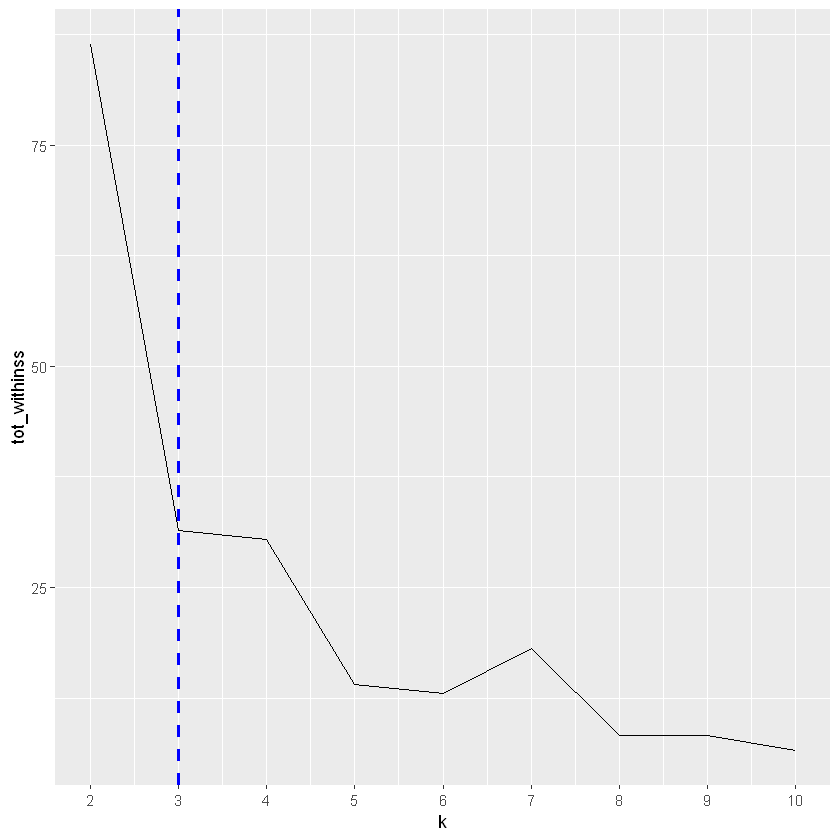

In [14]:
# fviz_nbclust(iris[,3:4], kmeans, method = "wss")
# Let's plot the elbow plot manually
set.seed(42)
library(purrr)
tot_withinss <- map_dbl(2:10, function(k){
    
    model <- kmeans(iris[,3:4], centers = k)
    model$tot.withinss

})

elbow_df <- data.frame(
    k = 2:10,
    tot_withinss = tot_withinss
)

print(elbow_df)


# Generating the elbow plot

ggplot(elbow_df, aes(x=k, y=tot_withinss)) + geom_line() + geom_vline(xintercept=3, linetype="dashed", 
                color = "blue", size=1) +
scale_x_continuous(breaks= 2:10)

Looking at the elbow plot, we can see that from `k=2` to `k=3`, we can still see an improvement in the total within sum of the squares but from 3 to 4 and 4 to 5, that change is marginal

[1] 0.9202805 0.5490104 0.5103691

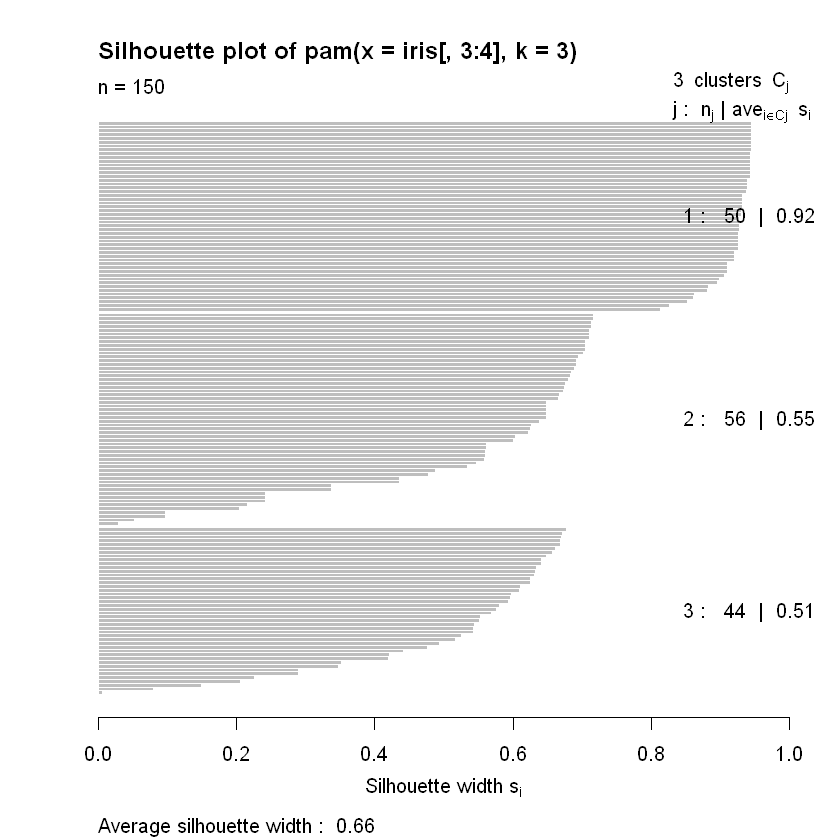

In [15]:
set.seed(42)
library(cluster)
pam_km3 <- pam(iris[,3:4], k=3)

pam_km3$silinfo$clus.avg.widths
sil_plot <- silhouette(pam_km3)
plot(sil_plot)


**An average silhouette width when using only Petal length and Petal width as predictors has improved from 0.55 to 0.66. This means that using only these two features we can almost guarantee that most observation are well matched to their clusters**

## Using scaled data

### Kmeans Cluster using Petal Width and Petal Length

In [16]:
iris.scaled = scale(iris[,1:4], scale = T)
head(iris.scaled, 5)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
-0.8976739,1.01560199,-1.335752,-1.311052
-1.1392005,-0.13153881,-1.335752,-1.311052
-1.3807271,0.32731751,-1.392399,-1.311052
-1.5014904,0.09788935,-1.279104,-1.311052
-1.0184372,1.24503015,-1.335752,-1.311052


In [17]:
# Set a seed to reproduce results
set.seed(42)

# Build a kmeans model using petal length and petal witdth
model_km2_scaled <- kmeans(iris.scaled[,3:4], centers=2, nstart = 25)
model_km3_scaled <- kmeans(iris.scaled[,3:4], centers=3, nstart = 25)
model_km4_scaled <- kmeans(iris.scaled[,3:4], centers=4, nstart = 25)
model_km5_scaled <- kmeans(iris.scaled[,3:4], centers=5, nstart = 25)
model_km6_scaled <- kmeans(iris.scaled[,3:4], centers=6, nstart = 25)
model_km7_scaled <- kmeans(iris.scaled[,3:4], centers=7, nstart = 25)

# cluster assignment vs the actual flower class
table(model_km2_scaled$cluster, iris$Species)
table(model_km3_scaled$cluster, iris$Species)
table(model_km4_scaled$cluster, iris$Species)
table(model_km5_scaled$cluster, iris$Species)
table(model_km6_scaled$cluster, iris$Species)
table(model_km7_scaled$cluster, iris$Species)

   
    setosa versicolor virginica
  1     50          0         0
  2      0         50        50

   
    setosa versicolor virginica
  1      0          2        46
  2      0         48         4
  3     50          0         0

   
    setosa versicolor virginica
  1      0          0        27
  2      0         42         0
  3      0          8        23
  4     50          0         0

   
    setosa versicolor virginica
  1      0          0        26
  2      0         23         0
  3      0         24         4
  4      0          3        20
  5     50          0         0

   
    setosa versicolor virginica
  1      0         25         0
  2      0          0        20
  3      0          0         8
  4     50          0         0
  5      0         23         4
  6      0          2        18

   
    setosa versicolor virginica
  1      0         21         0
  2      0         16         4
  3      0          0         8
  4      0         11         0
  5      0          2        18
  6      0          0        20
  7     50          0         0

In [18]:
# elbow plot for scaled data
# fviz_nbclust(iris.scaled[,3:4], kmeans, method = "wss")

   k tot_withinss
1  2    53.807656
2  3    17.906783
3  4    17.179024
4  5     9.143840
5  6     8.445601
6  7    11.199872
7  8     5.227006
8  9     5.317271
9 10     4.092307


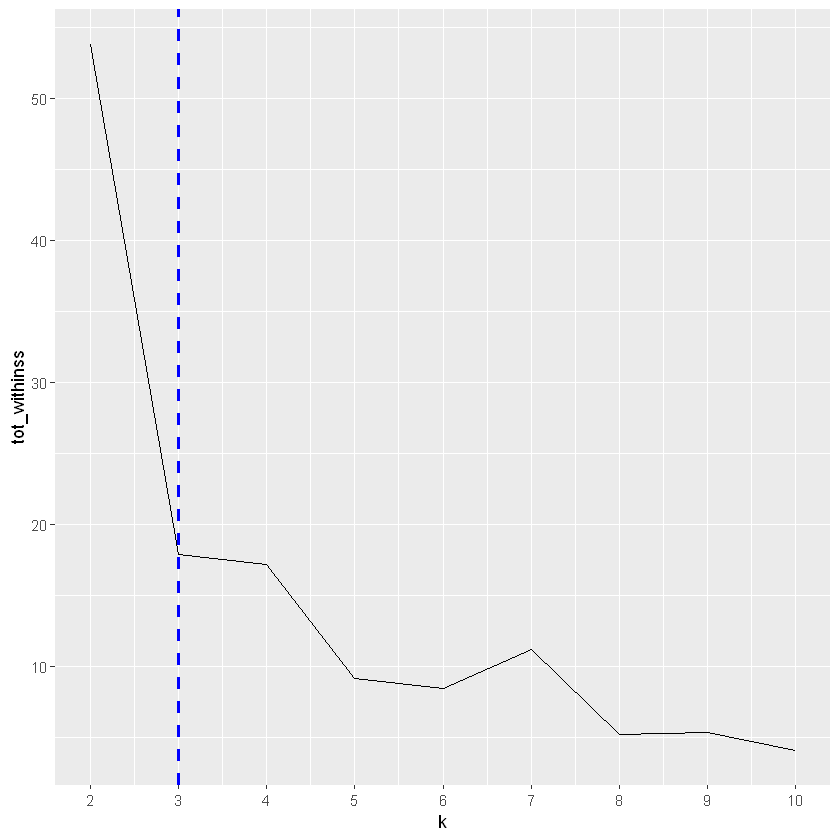

In [19]:
# Let's plot the elbow plot manually
set.seed(42)
library(purrr)
tot_withinss <- map_dbl(2:10, function(k){
    
    model <- kmeans(iris.scaled[,3:4], centers = k)
    model$tot.withinss

})

elbow_df <- data.frame(
    k = 2:10,
    tot_withinss = tot_withinss
)

print(elbow_df)


# Generating the elbow plot
ggplot(elbow_df, aes(x=k, y=tot_withinss)) + geom_line() + geom_vline(xintercept=3, linetype="dashed", 
                color = "blue", size=1) +
scale_x_continuous(breaks= 2:10)

The optimal k occurs at the bend of the elbow

[1] 0.9045159 0.6038153 0.5103231

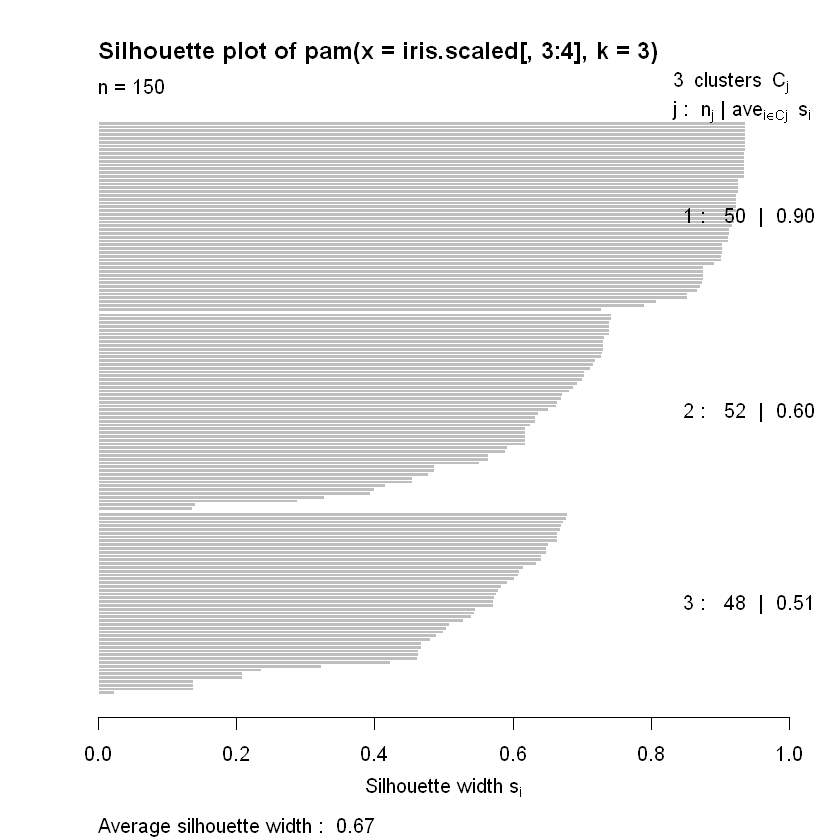

In [20]:
set.seed(42)
library(cluster)
pam_km3_scaled <- pam(iris.scaled[,3:4], k=3)

pam_km3_scaled$silinfo$clus.avg.widths
sil_plot <- silhouette(pam_km3_scaled)
plot(sil_plot)

An average silhouette width when using only Petal length and Petal width as predictors has slightly improved from 0.66 to 0.67.
Scaled vs unscaled dataset didnt matter much when using Petal length and Petal width as predictors. We were still able to achieve a `96%` clusering accuracy using `k=3`

<font color='brown'> <strong>To conclude, using petal length and width as predictors allowed us to achieve a `96%` clustering accuracy while using `k=3`.
If we didnt have a prior knowledge of the flower class, we can still recommend `k=3` because we could still see an improvement in our elbow plot and from our silhouette analysis plot, we see that most of our observations are well matched to their cluster </strong></font>